# Museum Artists and Artworks Analysis
By Danny Lam <br>
December 10, 2021

##  Assessment 
---
1. Which artist in this data set lived the longest?
2. Who are the top 10 artists by the number of artworks?
3. Which artist created the most artwork by total surface area?
4. Did any artists have artwork acquired during their lifetime?
5. Data quality review and issues I faced.


## Data 
---
The data used in this assessment is sourced from the Mueseum of Modern Art (MoMA) on Kaggle:<br>
https://www.kaggle.com/momanyc/museum-collection <br>

There are 2 datasets:
- artists = 15,091 records and 6 columns
- artworks = 130,262 records and 21 columns


In [1]:
#import data analysis libraries
import pandas as pd
import numpy as np
import warnings #let us hide warnings from displaying in jupyter notebook
warnings.filterwarnings('ignore')

# import data visualization libraries
import plotly
import seaborn as sns
from matplotlib import pyplot as plt
sns.set_style("darkgrid")   # seaborn chart style

#import museum data sourced from Kaggle
artists = pd.read_csv("artists.csv")
artworks = pd.read_csv("artworks.csv")

I will preview and inspect the `artists` dataset:

In [2]:
# quick look of dataset

display(artists)

,Artist ID,Name,Nationality,Gender,Birth Year,Death Year
0,1,Robert Arneson,American,Male,1930.0,1992.0
1,2,Doroteo Arnaiz,Spanish,Male,1936.0,NaN
2,3,Bill Arnold,American,Male,1941.0,NaN
3,4,Charles Arnoldi,American,Male,1946.0,NaN
4,5,Per Arnoldi,Danish,Male,1941.0,NaN
...,...,...,...,...,...,...
15086,67452,Liu Jianhua,Chinese,Male,1962.0,NaN
15087,67453,Leng Lin,Chinese,Male,1965.0,NaN
15088,67652,Ellie Nagler,NaN,NaN,NaN,NaN
15089,67694,Glenn Williams,NaN,Male,NaN,NaN


In [3]:
# it is confirmed that there are 15,091 records and 6 columns

artists.shape

(15091, 6)

In [4]:
# i used the info() method to get additional information about the artists dataset 
# inlcuding datatype of the different columns

artists.info()

# here you can see how many missing values exist in each column, especially Death Year

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15091 entries, 0 to 15090
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Artist ID    15091 non-null  int64  
 1   Name         15091 non-null  object 
 2   Nationality  12603 non-null  object 
 3   Gender       12019 non-null  object 
 4   Birth Year   11237 non-null  float64
 5   Death Year   4579 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 707.5+ KB


I will also preview and inspect the `artworks` dataset:

In [5]:
# quick look of dataset

artworks.head()

,Artwork ID,Title,Artist ID,Name,Date,Medium,Dimensions,Acquisition Date,Credit,Catalogue,...,Classification,Object Number,Diameter (cm),Circumference (cm),Height (cm),Length (cm),Width (cm),Depth (cm),Weight (kg),Duration (s)
0,2,"Ferdinandsbrücke Project, Vienna, Austria, Ele...",6210,Otto Wagner,1896,Ink and cut-and-pasted painted pages on paper,"19 1/8 x 66 1/2"" (48.6 x 168.9 cm)",1996-04-09,Fractional and promised gift of Jo Carole and ...,Y,...,Architecture,885.1996,NaN,NaN,48.6000,NaN,168.9000,NaN,NaN,NaN
1,3,"City of Music, National Superior Conservatory ...",7470,Christian de Portzamparc,1987,Paint and colored pencil on print,"16 x 11 3/4"" (40.6 x 29.8 cm)",1995-01-17,Gift of the architect in honor of Lily Auchinc...,Y,...,Architecture,1.1995,NaN,NaN,40.6401,NaN,29.8451,NaN,NaN,NaN
2,4,"Villa near Vienna Project, Outside Vienna, Aus...",7605,Emil Hoppe,1903,"Graphite, pen, color pencil, ink, and gouache ...","13 1/2 x 12 1/2"" (34.3 x 31.8 cm)",1997-01-15,Gift of Jo Carole and Ronald S. Lauder,Y,...,Architecture,1.1997,NaN,NaN,34.3000,NaN,31.8000,NaN,NaN,NaN
3,5,"The Manhattan Transcripts Project, New York, N...",7056,Bernard Tschumi,1980,Photographic reproduction with colored synthet...,"20 x 20"" (50.8 x 50.8 cm)",1995-01-17,Purchase and partial gift of the architect in ...,Y,...,Architecture,2.1995,NaN,NaN,50.8000,NaN,50.8000,NaN,NaN,NaN
4,6,"Villa, project, outside Vienna, Austria, Exter...",7605,Emil Hoppe,1903,"Graphite, color pencil, ink, and gouache on tr...","15 1/8 x 7 1/2"" (38.4 x 19.1 cm)",1997-01-15,Gift of Jo Carole and Ronald S. Lauder,Y,...,Architecture,2.1997,NaN,NaN,38.4000,NaN,19.1000,NaN,NaN,NaN


In [6]:
# it is confirmed that there are 130,262 records and 21 columns

artworks.shape

(130262, 21)

In [7]:
# quick look at the artworks info

artworks.info()
# there are some artworks that do not have a title or an Artist ID

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130262 entries, 0 to 130261
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Artwork ID          130262 non-null  int64  
 1   Title               130210 non-null  object 
 2   Artist ID           128802 non-null  object 
 3   Name                128802 non-null  object 
 4   Date                127950 non-null  object 
 5   Medium              118343 non-null  object 
 6   Dimensions          118799 non-null  object 
 7   Acquisition Date    124799 non-null  object 
 8   Credit              127192 non-null  object 
 9   Catalogue           130262 non-null  object 
 10  Department          130262 non-null  object 
 11  Classification      130262 non-null  object 
 12  Object Number       130262 non-null  object 
 13  Diameter (cm)       1399 non-null    float64
 14  Circumference (cm)  10 non-null      float64
 15  Height (cm)         111893 non-nul

## 1. Which artist in this data set lived the longest?
---
Before I answer the question and start the analysis process, I will clean the dataset in dataframes to prevent any errors.<br>
Because there are many null values in either the `Birth Year` or `Death Year`, I will drop all records that are null in both `Birth Year` AND `Death Year`. <br>
I will also drop null values for only `Birth Year` because there be some records that have a null `Birth Year`, but have a `Death Year`.<br>

In [8]:
# drop all rows that have NaN values for the Birth Year AND Death Year columns

nonull_artists = artists.dropna(subset=['Birth Year','Death Year'], how='all')
print(nonull_artists)

#the number of rows changed from 15,091 to 11,250

       Artist ID             Name Nationality  Gender  Birth Year  Death Year
0              1   Robert Arneson    American    Male      1930.0      1992.0
1              2   Doroteo Arnaiz     Spanish    Male      1936.0         NaN
2              3      Bill Arnold    American    Male      1941.0         NaN
3              4  Charles Arnoldi    American    Male      1946.0         NaN
4              5      Per Arnoldi      Danish    Male      1941.0         NaN
...          ...              ...         ...     ...         ...         ...
15082      67379          N. Dash    American  Female      1980.0         NaN
15084      67437  Sebastian Black    American    Male      1985.0         NaN
15085      67451          Xiao Yu     Chinese    Male      1965.0         NaN
15086      67452      Liu Jianhua     Chinese    Male      1962.0         NaN
15087      67453         Leng Lin     Chinese    Male      1965.0         NaN

[11250 rows x 6 columns]


In [9]:
# here i will drop nulls in Birth Year

final_artists = nonull_artists.dropna(subset=['Birth Year'], how='all')
print(final_artists)

# 11,237 rows matches the number of non-null that Birth Year has
# notice how this step changed it from 11,250 rows to 11,237

       Artist ID             Name Nationality  Gender  Birth Year  Death Year
0              1   Robert Arneson    American    Male      1930.0      1992.0
1              2   Doroteo Arnaiz     Spanish    Male      1936.0         NaN
2              3      Bill Arnold    American    Male      1941.0         NaN
3              4  Charles Arnoldi    American    Male      1946.0         NaN
4              5      Per Arnoldi      Danish    Male      1941.0         NaN
...          ...              ...         ...     ...         ...         ...
15082      67379          N. Dash    American  Female      1980.0         NaN
15084      67437  Sebastian Black    American    Male      1985.0         NaN
15085      67451          Xiao Yu     Chinese    Male      1965.0         NaN
15086      67452      Liu Jianhua     Chinese    Male      1962.0         NaN
15087      67453         Leng Lin     Chinese    Male      1965.0         NaN

[11237 rows x 6 columns]


I am assuming `Death Year` with null values means that the artist is still alive, so I will convert NaN to 2021 just to calculate their current age. <br>

In [10]:
# now i want to fill in null values for Death Year with '2021' so that I can calculate the current age of the artist

final_artists['Death Year'].fillna(2021, inplace = True)

final_artists.info()
# now both Years match 11,237 rows

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11237 entries, 0 to 15087
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Artist ID    11237 non-null  int64  
 1   Name         11237 non-null  object 
 2   Nationality  10951 non-null  object 
 3   Gender       10377 non-null  object 
 4   Birth Year   11237 non-null  float64
 5   Death Year   11237 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 614.5+ KB


In [11]:
# i want to change the datatype for Birth Year and Death Year from float to int
# i'm not allowed to change datatype while there are null values, so that is also why I removed the null values

final_artists['Birth Year'] = final_artists['Birth Year'].astype(int)
final_artists['Death Year'] = final_artists['Death Year'].astype(int)

display(final_artists.dtypes)
# Birth Year and Death Year are now int datatype

Artist ID       int64
Name           object
Nationality    object
Gender         object
Birth Year      int64
Death Year      int64
dtype: object

In [12]:
# i determined the age the artist lived until by subtracting the 'Death Year' by the 'Birth Year'

# this will add a new column to the dataframe: the calculated age of the artists
final_artists['Age'] = final_artists['Death Year'] - final_artists['Birth Year']

display(final_artists)

,Artist ID,Name,Nationality,Gender,Birth Year,Death Year,Age
0,1,Robert Arneson,American,Male,1930,1992,62
1,2,Doroteo Arnaiz,Spanish,Male,1936,2021,85
2,3,Bill Arnold,American,Male,1941,2021,80
3,4,Charles Arnoldi,American,Male,1946,2021,75
4,5,Per Arnoldi,Danish,Male,1941,2021,80
...,...,...,...,...,...,...,...
15082,67379,N. Dash,American,Female,1980,2021,41
15084,67437,Sebastian Black,American,Male,1985,2021,36
15085,67451,Xiao Yu,Chinese,Male,1965,2021,56
15086,67452,Liu Jianhua,Chinese,Male,1962,2021,59


In [13]:
# i will do a quick check to see the top artist ages
# used nlargest method to grab the top 5 ages

final_artists['Age'].nlargest(5)

# I noticed that there are ages of 200+ 
# That is impossible. So what went wrong??

2312    290
8086    256
4720    220
8073    219
8047    213
Name: Age, dtype: int64

In [14]:
# I will pull the record with the max Age

max_index = final_artists['Age'].idxmax()
display(max_index)

max_row = final_artists.loc[[max_index]]
display(max_row)

# Okay, now I realized a big mistake...

2312

,Artist ID,Name,Nationality,Gender,Birth Year,Death Year,Age
2312,2589,"J.A. Henckels, Solingen, Germany",NaN,NaN,1731,2021,290


Okay, now I realized a big mistake: <br>

I assumed that a null `Death Year` means that the artist is still alive. <br>
Now I am aware that the `Birth Year` could be recorded and not the `Death Year`, 
even though that artist is obviously dead. <br>
<br>
Artist J.A. Henckels was born in 1731 and orginally had a `Death Year` of null. <br>
It is impossible for him to be 290 years old.
<br>
After reading the question again, I am reassured that it is asking for artists that lived the longest, meaning that they have already passed away. <br>
So I need to have both `Birth Year` and `Death Year` filled.<br>
This is an easy fix. I will leave my error logged and continue with my process.

In [15]:
# instead of dropping records that have both years as null, 
# I will drop any record that have ANY null in either Birth Year or Death Year
# since I made no permanent change to the original dataframe, I can easily create a new dataframe with my revisions 

revised_artists = artists.dropna(subset=['Birth Year','Death Year'])
revised_artists.info()

# notice how there are a lot less records
# this means that out of the entire dataset, 
# there are only 4,566 artists that have proper year data recorded and are actually dead

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4566 entries, 0 to 15079
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Artist ID    4566 non-null   int64  
 1   Name         4566 non-null   object 
 2   Nationality  4514 non-null   object 
 3   Gender       4462 non-null   object 
 4   Birth Year   4566 non-null   float64
 5   Death Year   4566 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 249.7+ KB


In [16]:
# i repeated the step to change the datatype from float to int for this new dataframe

revised_artists['Birth Year'] = revised_artists['Birth Year'].astype(int)
revised_artists['Death Year'] = revised_artists['Death Year'].astype(int)

display(revised_artists.dtypes)

Artist ID       int64
Name           object
Nationality    object
Gender         object
Birth Year      int64
Death Year      int64
dtype: object

In [17]:
# i repeated the step that adds a new column of the calculated age
revised_artists['Age'] = revised_artists['Death Year'] - revised_artists['Birth Year']

display(revised_artists)

,Artist ID,Name,Nationality,Gender,Birth Year,Death Year,Age
0,1,Robert Arneson,American,Male,1930,1992,62
9,11,Jean (Hans) Arp,French,Male,1886,1966,80
11,13,J. Arrelano Fischer,Mexican,Male,1911,1995,84
12,15,Folke Arstrom,Swedish,Male,1907,1997,90
13,16,Cristobal Arteche,Spanish,Male,1900,1964,64
...,...,...,...,...,...,...,...
15035,67127,John Sex,American,NaN,1956,1990,34
15036,67128,Egidio Bonfante,Italian,Male,1922,2004,82
15072,67336,Cal Dalton,American,NaN,1908,1974,66
15073,67337,Cal Howard,American,NaN,1911,1993,82


In [18]:
# okay, now I will check to see if there are any errors this time

revised_artists['Age'].nlargest(5)

# the oldest artist lived is 130 years old

12486    130
3449     108
9164     108
13568    107
1549     106
Name: Age, dtype: int64

In [19]:
# i pulled the record with the max age

max_index = revised_artists['Age'].idxmax()
display(max_index)

max_row = revised_artists.loc[[max_index]]
display(max_row)

12486

,Artist ID,Name,Nationality,Gender,Birth Year,Death Year,Age
12486,38294,"Union Paper Bag Machine Company, Philadelphia, PA",NaN,NaN,1869,1999,130


I notice that the artist is a company instead of a person. <br>
After I did some [research](https://www.moma.org/explore/inside_out/2010/11/03/in-the-bag/), 
I found out that the artist who created the paper bag was Francis Wolle, and he died in 1893. <br>
Since the max age is of a company, I will move to the next record for the sake of answering the question properly. <br>
<br>
There are 2 artists that tie for the oldest artist lived at 108 years old. <br>

In [20]:
# i grabbed the indexes 9164 and 3449 and input them into my code

real_max_row = revised_artists.loc[[9164,3449]]
display(real_max_row)

# the results show that B. Efimov and Leni Matthaei are the oldest artists that lived in this dataset

,Artist ID,Name,Nationality,Gender,Birth Year,Death Year,Age
9164,23931,B. Efimov,Russian,Male,1900,2008,108
3449,3844,Leni Matthaei,German,Female,1873,1981,108


Just to verify that this is accurate, I will fact check my results: <br>
- [Boris Efimov](https://en.wikipedia.org/wiki/Boris_Yefimov) was a Russian cartoonist best known for his critical political caricatures of Adolf Hitler and other Nazis. He was born on October 11, 1900 and died October 1, 2008. <br>
<br>
- [Leni Matthaei](https://www.moma.org/artists/3844#works) was a German artist that created the Abstract Landscape made of linen bobbin lace and is stored at the MoMA. She was born in 1873 and died in 1981.<br>

### Which artist in this data set lived the longest?

### `Boris Efimov and Leni Matthaei are the oldest artists that lived in this dataset.`

## Data Visualization of the oldest artists that lived:

In [21]:
# create a filtered dataframe with 108 as the oldest age
artists_plot = revised_artists[(final_artists['Age'] <= 108)]

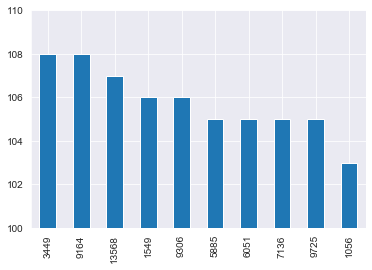

In [22]:
#colors = list(artists_plot(Name(['b', 'r', 'g', 'y', 'k']), None, len(df)))

# plot the graph
artists_plot['Age'].nlargest(10).plot(kind='bar', ylim=(100,110))

# i notice the xticks are the index of artists

In [23]:
# to change this, I dropped the indexes and replaced it with the artists names
artists_plot.set_index("Name",drop=True,inplace=True)

artists_plot.index.values

array(['Robert Arneson', 'Jean (Hans) Arp', 'J. Arrelano Fischer', ...,
       'Cal Dalton', 'Cal Howard', 'Howard Guttenplan'], dtype=object)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

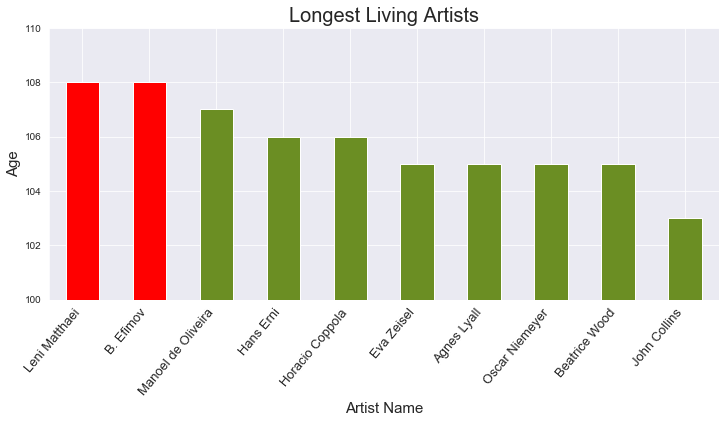

In [45]:
# now the plot has their names on the x-axis

artists_plot['Age'].nlargest(10).plot(kind='bar', ylim=(100,110), color=['red', 'red', 'olivedrab', 'olivedrab',\
                                    'olivedrab','olivedrab','olivedrab', 'olivedrab', 'olivedrab', 'olivedrab'])

# plot modifications
plt.rcParams["figure.figsize"] = [12, 5]
plt.title("Longest Living Artists",size=20)
plt.xlabel("Artist Name",size=15)
plt.ylabel("Age",size=15)
plt.xticks(rotation=50, horizontalalignment="right", size=13)

# the red bars are the 2 oldest artists: Boris Efimov and Leni Matthaei

# 2. Who are the top 10 artists by the number of artworks?
---

I will create a new dataframe from the dataset to only look at relative columns.<br>
Then, I will remove null values in `artists`. <br>
After that, I should be able to determine which artists have to most number of artworks.

In [25]:
# since there are a lot of columns we don't need at the moment, i will create a dataframe with the relative columns

top_artists_by_num_artworks = artworks[['Artwork ID', 'Title', 'Artist ID', 'Name']]
top_artists_by_num_artworks.head()

,Artwork ID,Title,Artist ID,Name
0,2,"Ferdinandsbrücke Project, Vienna, Austria, Ele...",6210,Otto Wagner
1,3,"City of Music, National Superior Conservatory ...",7470,Christian de Portzamparc
2,4,"Villa near Vienna Project, Outside Vienna, Aus...",7605,Emil Hoppe
3,5,"The Manhattan Transcripts Project, New York, N...",7056,Bernard Tschumi
4,6,"Villa, project, outside Vienna, Austria, Exter...",7605,Emil Hoppe


In [26]:
# a quick look at the info

top_artists_by_num_artworks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130262 entries, 0 to 130261
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Artwork ID  130262 non-null  int64 
 1   Title       130210 non-null  object
 2   Artist ID   128802 non-null  object
 3   Name        128802 non-null  object
dtypes: int64(1), object(3)
memory usage: 4.0+ MB


In [27]:
# I will remove the artworks that have null values in Artist ID and Name

most_artworks = top_artists_by_num_artworks.dropna(subset=['Artist ID','Name'])
most_artworks.info()

# now the dataframe is cleaner for analysis

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128802 entries, 0 to 130261
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Artwork ID  128802 non-null  int64 
 1   Title       128776 non-null  object
 2   Artist ID   128802 non-null  object
 3   Name        128802 non-null  object
dtypes: int64(1), object(3)
memory usage: 4.9+ MB


In [28]:
# used the value_counts method to count all the unique values of the artist names

most_artworks['Name'].value_counts().to_frame()[:11]

# the top 10 artists with the most number of artworks are displayed below
# because the 4th top artist is actually 'Unknown photographer',
# I included the top 11 to get one more artist name.

,Name
Eugène Atget,5050
Louise Bourgeois,3318
Ludwig Mies van der Rohe,2566
Unknown photographer,1575
Jean Dubuffet,1435
Lee Friedlander,1317
Pablo Picasso,1310
Marc Chagall,1162
Henri Matisse,1063
Pierre Bonnard,894


### Who are the top 10 artists by the number of artworks?

### The top 10 artists with the most number of artworks displayed are `Eugène Atget`, `Louise Bourgeois`, `Ludwig Mies van der Rohe`, `Jean Dubuffet`, `Lee Friedlander`, `Pablo Picasso`, `Marc Chagall`, `Henri Matisse`, `Pierre Bonnard`, and `Lilly Reich`.

In [29]:
# to make my results more accurate, I will replace 'Unknown photographer' with NaN

bye_unknown_photographer = most_artworks.replace('Unknown photographer', np.nan)
bye_unknown_photographer.info()

# the number of null values in 'Name' have increased after the change

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128802 entries, 0 to 130261
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Artwork ID  128802 non-null  int64 
 1   Title       128776 non-null  object
 2   Artist ID   128802 non-null  object
 3   Name        127227 non-null  object
dtypes: int64(1), object(3)
memory usage: 4.9+ MB


In [30]:
# now the top 10 results are clean and accurate

bye_unknown_photographer['Name'].value_counts().to_frame()[:10]

,Name
Eugène Atget,5050
Louise Bourgeois,3318
Ludwig Mies van der Rohe,2566
Jean Dubuffet,1435
Lee Friedlander,1317
Pablo Picasso,1310
Marc Chagall,1162
Henri Matisse,1063
Pierre Bonnard,894
Lilly Reich,823


## Data visualization of the top 10 artists with the most artworks:

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

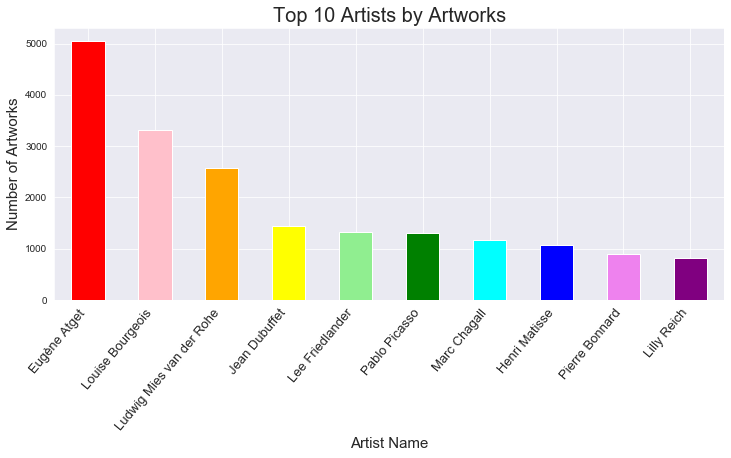

In [31]:
# here i use value_counts() and plot() together
bye_unknown_photographer['Name'].value_counts()[:10].plot(kind='bar', color=['red', 'pink', 'orange', \
                                            'yellow','lightgreen','green', 'cyan', 'blue', 'violet', 'purple'])

# modifications to the bar chart
plt.rcParams["figure.figsize"] = [12, 5]
plt.title("Top 10 Artists by Artworks",size=20)
plt.xlabel("Artist Name",size=15)
plt.ylabel("Number of Artworks",size=15)
plt.xticks(rotation=50, horizontalalignment="right", size=13)

# 3. Which artist created the most artwork by total surface area?
---

First, I will figure out which measurement to use for the surface area equation. <br>
Since surface area is for 3D artworks, I will drop any nulls in `Depth (cm)`, because those are probably 2D paintings. <br>
The equation for surface area is ***`SA = 2(LW + LH + WH)`***. <br>
Since `Length (cm)` is a very small fraction of the total number of artworks, I went with `Depth (cm)` instead. <br>
After creating a new column for surface area, I will use a pivot table to add the sum of all the surface areas by artists. <br>


In [32]:
# i will create a new dataframe with the relative columns to find surface area

SA_artworks = artworks[['Artist ID', 'Name', 'Height (cm)', 'Width (cm)','Depth (cm)']]
SA_artworks.head()

,Artist ID,Name,Height (cm),Width (cm),Depth (cm)
0,6210,Otto Wagner,48.6000,168.9000,NaN
1,7470,Christian de Portzamparc,40.6401,29.8451,NaN
2,7605,Emil Hoppe,34.3000,31.8000,NaN
3,7056,Bernard Tschumi,50.8000,50.8000,NaN
4,7605,Emil Hoppe,38.4000,19.1000,NaN


In [33]:
# a quick look at the info

SA_artworks.info()

# there a far less Depth (cm) data compared to the other measurements

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130262 entries, 0 to 130261
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Artist ID    128802 non-null  object 
 1   Name         128802 non-null  object 
 2   Height (cm)  111893 non-null  float64
 3   Width (cm)   111003 non-null  float64
 4   Depth (cm)   11443 non-null   float64
dtypes: float64(3), object(2)
memory usage: 5.0+ MB


In [34]:
# i will drop any records with null values in Height, Width, or Depth

SA_artworks = SA_artworks.dropna(subset=['Height (cm)','Width (cm)','Depth (cm)'])
SA_artworks.info()

# the number of records have decreased by a lot because there are lots of nulls in Depth (cm)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11377 entries, 110 to 130261
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Artist ID    10830 non-null  object 
 1   Name         10830 non-null  object 
 2   Height (cm)  11377 non-null  float64
 3   Width (cm)   11377 non-null  float64
 4   Depth (cm)   11377 non-null  float64
dtypes: float64(3), object(2)
memory usage: 533.3+ KB


I will use 3 dimensions for the equation: `Height (cm)`, `Width (cm)`, and `Depth (cm)`. <br>
Again, the equation for `Surface Area = 2(LW + LH + WH)`

In [35]:
# create a new column for the surface area 

SA_artworks['Surface Area'] = 2 * ((SA_artworks['Depth (cm)']*SA_artworks['Width (cm)']) + \
                                (SA_artworks['Depth (cm)']*SA_artworks['Height (cm)']) + \
                                (SA_artworks['Width (cm)']*SA_artworks['Height (cm)']))


In [36]:
# display the (top 5) records in descending order by Surface Area

SA_artworks.sort_values(by='Surface Area', ascending=False)[:5]

# Rachel Harrison has the largest artwork, 
# however the we are looking for the TOTAL surface area by an artist
# I would need to get the sum of the surface area and group them by artist somehow

,Artist ID,Name,Height (cm),Width (cm),Depth (cm),Surface Area
108404,7855,Rachel Harrison,457.200914,1262.382525,1808.483617,7.374002e+06
87538,5349,Richard Serra,9140.000000,200.000000,152.400300,6.502838e+06
80901,"26421, 26424","Louise Wilson, Jane Wilson",548.641100,1066.802100,1066.802100,4.617299e+06
75160,7489,Tony Oursler,348.000000,1033.800000,853.400000,3.077981e+06
74825,5349,Richard Serra,373.400000,807.700000,990.600000,2.943186e+06


In [37]:
# a pivot table will group the total Surface Area by artist
# and I sorted this pivot table so that we can see who has the most surface area combined of all their artworks

SA_artworks2 = pd.pivot_table(SA_artworks,index='Name', values='Surface Area', aggfunc='sum')\
                                .sort_values('Surface Area', ascending=False)

SA_artworks2[:1]
# Richard Serra has created the most artwork by total surface area.

,Surface Area
Name,
Richard Serra,1.496169e+07


### Which artist created the most artwork by total surface area?

### `Richard Serra has created the most artwork by the total surface area of 8,584,234 cm`<sup>`2`</sup>.
[Richard Serra](https://www.moma.org/artists/5349) is an American artist known for his large-scale sculptures made for landscape, urban, and architectural settings. 

## Data visualization of the most artwork by total surface area:

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

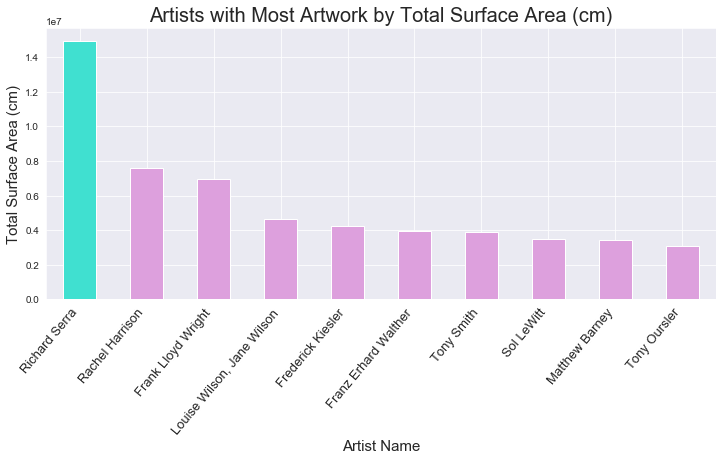

In [38]:
# plot the graph
artworks_plot = SA_artworks2['Surface Area'].nlargest(10).plot(kind='bar',color=['turquoise', 'plum', 'plum', 'plum',\
                                                                    'plum','plum','plum', 'plum', 'plum', 'plum'])
# show plot
artworks_plot

# plot modifications
plt.rcParams["figure.figsize"] = [12, 5]
plt.title("Artists with Most Artwork by Total Surface Area (cm)",size=20)
plt.xlabel("Artist Name",size=15)
plt.ylabel("Total Surface Area (cm)",size=15)
plt.xticks(rotation=50, horizontalalignment="right", size=13)

# Richard Serra is first with the turquoise bar

# 4. Did any artists have artwork acquired during their lifetime?
---

For this problem, I would need to join the `artists` and `artworks` datasets together. <br>
Before I do that, I need to make sure the primary key `Artist ID` is the same datatype in `artists` and `artworks` so that there won't be an error. <br>
Once the datasets are combined, I will query for artists that had artwork acquired during their life time. <br>

In [39]:
# I will use the 'final_artists' dataframe I created above because it has dropped nulls and Death Year is set to 2021
# filter out anyone over the age of 108 because I know the oldest artists lived until 108

artists2 = final_artists[(final_artists['Age'] <= 108)]

I want to merge the artists and artworks datasets later. <br>
To do that, I need `Artist ID` on both datasets to be the same datatype.

In [40]:
# i changed 'Artist ID' in the artists dataset from int to string

artists2['Artist ID'] = artists2['Artist ID'].astype(str)
artists2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11044 entries, 0 to 15087
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Artist ID    11044 non-null  object
 1   Name         11044 non-null  object
 2   Nationality  10780 non-null  object
 3   Gender       10275 non-null  object
 4   Birth Year   11044 non-null  int64 
 5   Death Year   11044 non-null  int64 
 6   Age          11044 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 690.2+ KB


In [41]:
# use the merge method to join both datasets together so that it will be easy to query any analysis

artists_plus_artworks = pd.merge(artists2, artworks, on='Artist ID', how='outer', indicator=False)
artists_plus_artworks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 132093 entries, 0 to 132092
Data columns (total 27 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Artist ID           130633 non-null  object 
 1   Name_x              116576 non-null  object 
 2   Nationality         116064 non-null  object 
 3   Gender              115112 non-null  object 
 4   Birth Year          116576 non-null  float64
 5   Death Year          116576 non-null  float64
 6   Age                 116576 non-null  float64
 7   Artwork ID          130262 non-null  float64
 8   Title               130210 non-null  object 
 9   Name_y              128802 non-null  object 
 10  Date                127950 non-null  object 
 11  Medium              118343 non-null  object 
 12  Dimensions          118799 non-null  object 
 13  Acquisition Date    124799 non-null  object 
 14  Credit              127192 non-null  object 
 15  Catalogue           130262 non-nul

In [42]:
# i will create a new dataframe with the relative columns to find out 
# which artist had artwork acquired during their lifetime

artists_plus_artworks = artists_plus_artworks[['Artist ID', 'Name_x', 'Acquisition Date', 'Birth Year','Death Year']]

In [43]:
# quick look at the new dataframe's info

artists_plus_artworks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 132093 entries, 0 to 132092
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Artist ID         130633 non-null  object 
 1   Name_x            116576 non-null  object 
 2   Acquisition Date  124799 non-null  object 
 3   Birth Year        116576 non-null  float64
 4   Death Year        116576 non-null  float64
dtypes: float64(2), object(3)
memory usage: 6.0+ MB


I want to change `Acquisition Date`, `Birth Year`, and `Death Year` to datetime format. <br>
This will make searching for `Acquisition Date` between `Birth Year` and `Death Year` error-free.

In [44]:
# change Acquisition Date from object to datetime

artists_plus_artworks['Acquisition Date'] = pd.to_datetime(artists_plus_artworks['Acquisition Date'], \
                                            format='%Y/%m/%d')

# there is an error: 
# "OutOfBoundsDatetime: Out of bounds nanosecond timestamp: 1216-10-18 00:00:00"
# I will try to figure out what went wrong

OutOfBoundsDatetime: Out of bounds nanosecond timestamp: 1216-10-18 00:00:00

In [46]:
# sort the 'Acquisition Date' in ascending order
 
artists_plus_artworks['Acquisition Date'].sort_values().to_frame().head()

,Acquisition Date
108814,1216-10-18
39163,1929-11-19
10263,1929-11-19
10267,1929-11-19
63315,1929-11-19


In [47]:
# i noticed that 1216 is such a out of place year while the next earliest year is 1929
# so I will locate the record containing the value "1216-10-18"

artists_plus_artworks.loc[artists_plus_artworks['Acquisition Date'] == '1216-10-18']

# i am assuming there was a typo in the orginal dataset and 1216 is suppose to be 2016

,Artist ID,Name_x,Acquisition Date,Birth Year,Death Year
108814,34673,Residents,1216-10-18,1972.0,2021.0


In [48]:
# I will use the replace method to change 1216 to 2016

artists_plus_artworks = artists_plus_artworks.replace(to_replace = '1216-10-18', value = '2016-10-18')

In [49]:
# i will relocate the value '1216-10-18'

artists_plus_artworks.loc[artists_plus_artworks['Acquisition Date'] == '1216-10-18']

# there is no more value of '1216-10-18' now

,Artist ID,Name_x,Acquisition Date,Birth Year,Death Year


In [50]:
# # so let's see if changing the datatype will work now

artists_plus_artworks['Acquisition Date'] = pd.to_datetime(artists_plus_artworks['Acquisition Date'], \
                                            format='%Y/%m/%d')

artists_plus_artworks.info()

# it worked! now 'Acquisition Date' is datetime format

<class 'pandas.core.frame.DataFrame'>
Int64Index: 132093 entries, 0 to 132092
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Artist ID         130633 non-null  object        
 1   Name_x            116576 non-null  object        
 2   Acquisition Date  124799 non-null  datetime64[ns]
 3   Birth Year        116576 non-null  float64       
 4   Death Year        116576 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 6.0+ MB


In [51]:
# now I will convert Birth Year and Death Year to datetime format

artists_plus_artworks['Birth Year'] = pd.to_datetime(artists_plus_artworks['Birth Year'], format='%Y')
artists_plus_artworks['Death Year'] = pd.to_datetime(artists_plus_artworks['Death Year'], format='%Y')

In [52]:
# checking to see if it the formats changed

artists_plus_artworks.info()

# now Acquisition Date, Birth Year, and Death Year are in datetime format

<class 'pandas.core.frame.DataFrame'>
Int64Index: 132093 entries, 0 to 132092
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Artist ID         130633 non-null  object        
 1   Name_x            116576 non-null  object        
 2   Acquisition Date  124799 non-null  datetime64[ns]
 3   Birth Year        116576 non-null  datetime64[ns]
 4   Death Year        116576 non-null  datetime64[ns]
dtypes: datetime64[ns](3), object(2)
memory usage: 6.0+ MB


The next step I will need to download `pandasql` package to Jupyter. <br>
I ran `pip install -U pandasql` in a cell. <br>
Now I can query in SQL using `pandas` instead of using a database software.

In [53]:
# import sqldf
from pandasql import sqldf

# sqldf method allows me to write in SQL and store it in a dataframe
artists_plus_artworks = sqldf("SELECT Name_x, `Birth Year`, `Death Year`,`Acquisition Date` \
                               FROM artists_plus_artworks \
                               WHERE (`Acquisition Date` > `Birth Year`) AND (`Acquisition Date` < `Death Year`);")


In [54]:
# here's a quick look at the queried data

artists_plus_artworks.head()

# all of these 'Acquisition Date' are between the 'Birth Year' and 'Death Year'

,Name_x,Birth Year,Death Year,Acquisition Date
0,Robert Arneson,1930-01-01 00:00:00.000000,1992-01-01 00:00:00.000000,1981-04-28 00:00:00.000000
1,Doroteo Arnaiz,1936-01-01 00:00:00.000000,2021-01-01 00:00:00.000000,1965-03-09 00:00:00.000000
2,Bill Arnold,1941-01-01 00:00:00.000000,2021-01-01 00:00:00.000000,1972-03-07 00:00:00.000000
3,Bill Arnold,1941-01-01 00:00:00.000000,2021-01-01 00:00:00.000000,1972-03-07 00:00:00.000000
4,Bill Arnold,1941-01-01 00:00:00.000000,2021-01-01 00:00:00.000000,1972-03-07 00:00:00.000000


In [55]:
# quick look at the info

artists_plus_artworks.info()

# from this, there are 71,213 artworks that got acquired during that artist's lifetime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71213 entries, 0 to 71212
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name_x            71213 non-null  object
 1   Birth Year        71213 non-null  object
 2   Death Year        71213 non-null  object
 3   Acquisition Date  71213 non-null  object
dtypes: object(4)
memory usage: 2.2+ MB


In [56]:
# use value_counts method to see how many distinct artists had artwork acquired during their lifetime

artists_plus_artworks['Name_x'].value_counts()

Louise Bourgeois    2425
Lee Friedlander     1314
Jean Dubuffet       1217
Marc Chagall        1156
Pablo Picasso       1090
                    ... 
Dave Stewart           1
Charles Berger         1
Marc Wise              1
Mary Lucier            1
Young Joon Kim         1
Name: Name_x, Length: 7555, dtype: int64

### Did any artists have artwork acquired during their lifetime?
Yes, there are a total of 7,555 artists that had artwork(s) acquired during their lifetime. <br>
Louise Bourgeois had the most artworks acquired during her lifetime at 2,425 pieces. 

# 5. Data quality review and issues I ran into
---

## Data Quality:
- At first glance, I could tell that the `artists` data looks easier to browse through. 
- When I filtered for duplicate artists, I noticed that there were a few repeating artists. However, I took a look at Carl Auböck since there were no null values for both, and found out that they are father and son. The other artists had null values so they would have got filtered out anyways.
- There were lots of null values in the `Birth Year` and `Death Year` columns. 
- I made an assumption that null values in `Death Year` means that the artist is still alive. That was an error because there was an artist born in 1731 with a null `Death Year`. I had to go back and revise my cleaning to be more accurate.
- For the `artworks` data, although I did not use a lot of the columns for my analysis, there were tons of nulls for every column.
- I found out that there was an outlier date of `1216-10-18` for the `Acquisition Date` column. It was even formatted different on the csv file. 
- While I was solving Question 3, I noticed that Richard Serra's artwork ["To Lift"](https://www.moma.org/collection/works/101902) had a height of 9140 cm when it was suppose to be 91.4 cm. Good thing that data error didn't make Richard the top artist when I was doing my analysis. 
- I assume that there are tons more errors, big or small, in these datasets, and that's the reality of dirty data. 

## Problems I faced:
- The results of the oldest living artist was a company intead of a artist or person. I had to move on to the second top result since the first one was inaccurate.
- In the artworks dataset, there are many unknown artists that is labeled as `Unknown photographer` instead of being null. Because of that, it messed up my analysis. 
- I had a tough time understanding what question 3 really meant by total surface area. I say this because most measurements were null except for `Height (cm)` and `Width (cm)`. I ended up adding `Depth (cm)` to the surface area equation to be able to work with more data.
- For question 4, I ran into issues when converting the `Acquisition Date` datatype from object to datetime. I found out that there is a timestamp of `1216-10-18`, which is a clear error so. After changing the value, my code to convert the datatype format worked.
- I made the mistake of concatenating my datasets together instead of merging them. `Concat` left a lot of null values for `Birth Year` and `Death Year`, while `merge` properly joined the datasets together. This made searching for my conditions a lot easier.

## What I learned:
- I need to make sure I understand the question correctly before I even start my cleaning process and analysis.
- The quality of the data will not always be perfect, so I have to minimize as much errors as possible to maximize accuracy of results.
- Some questions took longer to prepare for, while other questions were quicker to obtain the result.
- Paying attention to the amount of non-null and null values in each column can give you a better understanding of what is going on and can help with troubleshooting.
- I learned how to join 2 datasets together using `merge` method in `pandas`, just like how SQL uses `JOIN`.